In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('restaurant.csv')

In [3]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

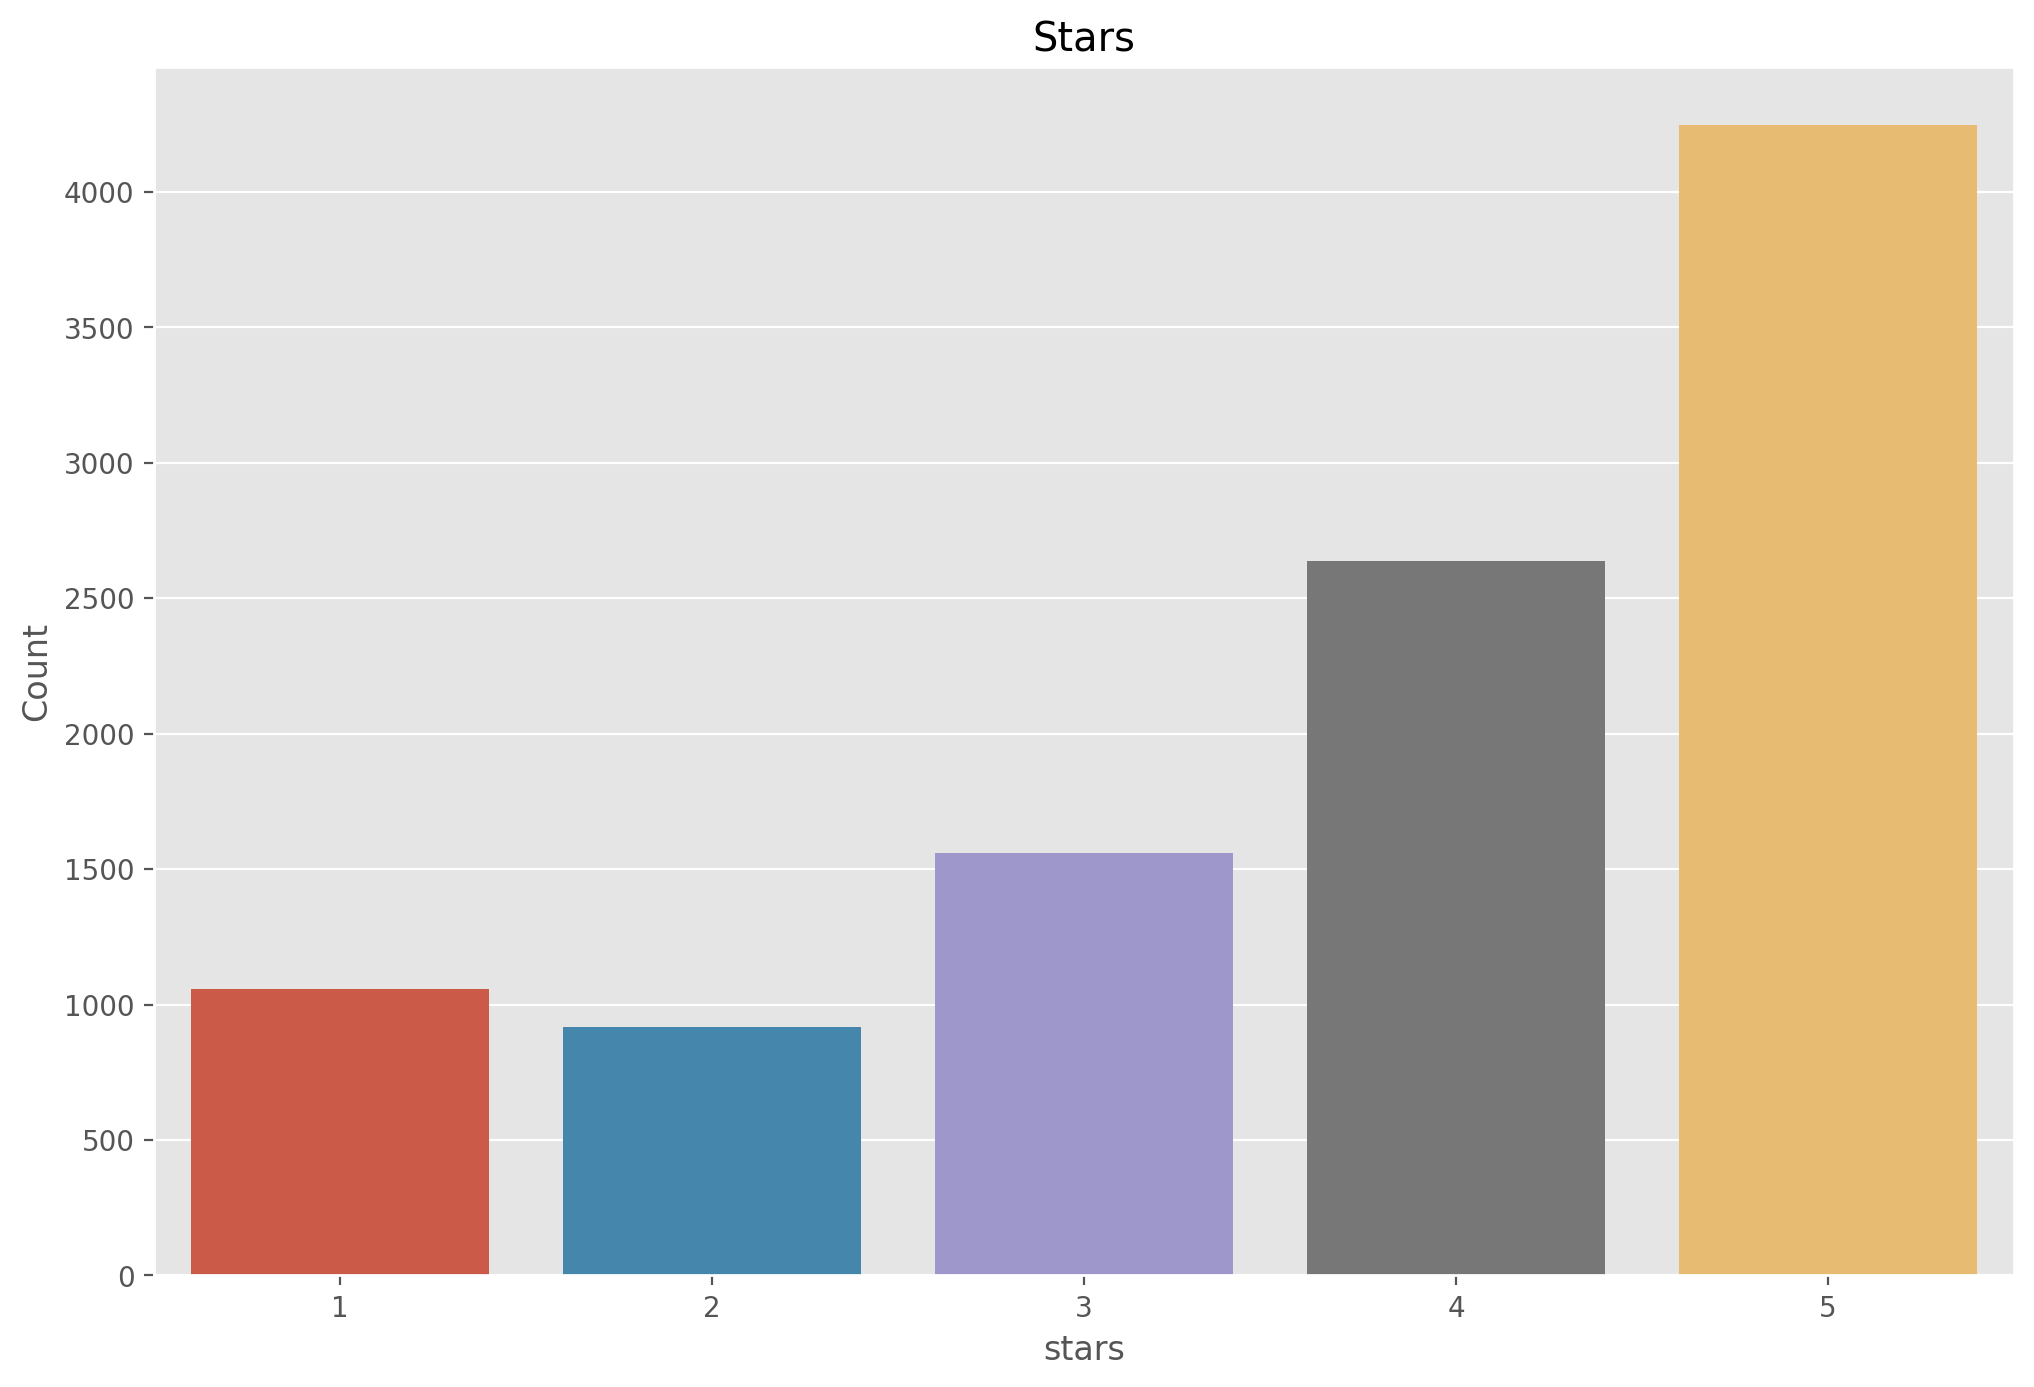

In [5]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(12,8), dpi=200)
ax = plt.subplot(111)
ax = sns.countplot(x='stars', data=df)
ax.set_title('Stars')
ax.set_ylabel('Count');

In [6]:
df['year'] = pd.DatetimeIndex(df['date']).year
df2 = pd.DataFrame(df.groupby('year').stars.mean())

C:\Users\Serap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


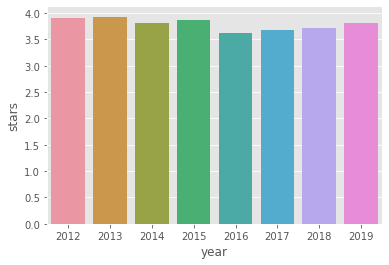

In [7]:
sns.barplot(df2.index, df2.stars);

In [8]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [9]:
df = df[['stars', 'text']]

In [10]:
def sen(a):
    if a < 3:
        return 'negative'
    elif a == 3:
        return 'neutral'
    else:
        return 'positive'

In [11]:
df['sentiment'] = df['stars'].map(sen)

In [12]:
df.head()

,stars,text,sentiment
0,5,After getting food poisoning at the Palms hote...,positive
1,4,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",positive
2,4,The crab legs are better than the ones at Wick...,positive
3,1,Not worth it! Too salty food and expensive! Th...,negative
4,5,I would give this infinite stars if I could. M...,positive


In [13]:
df['sentiment'].value_counts(normalize=True)

positive    0.660747
negative    0.189402
neutral     0.149851
Name: sentiment, dtype: float64

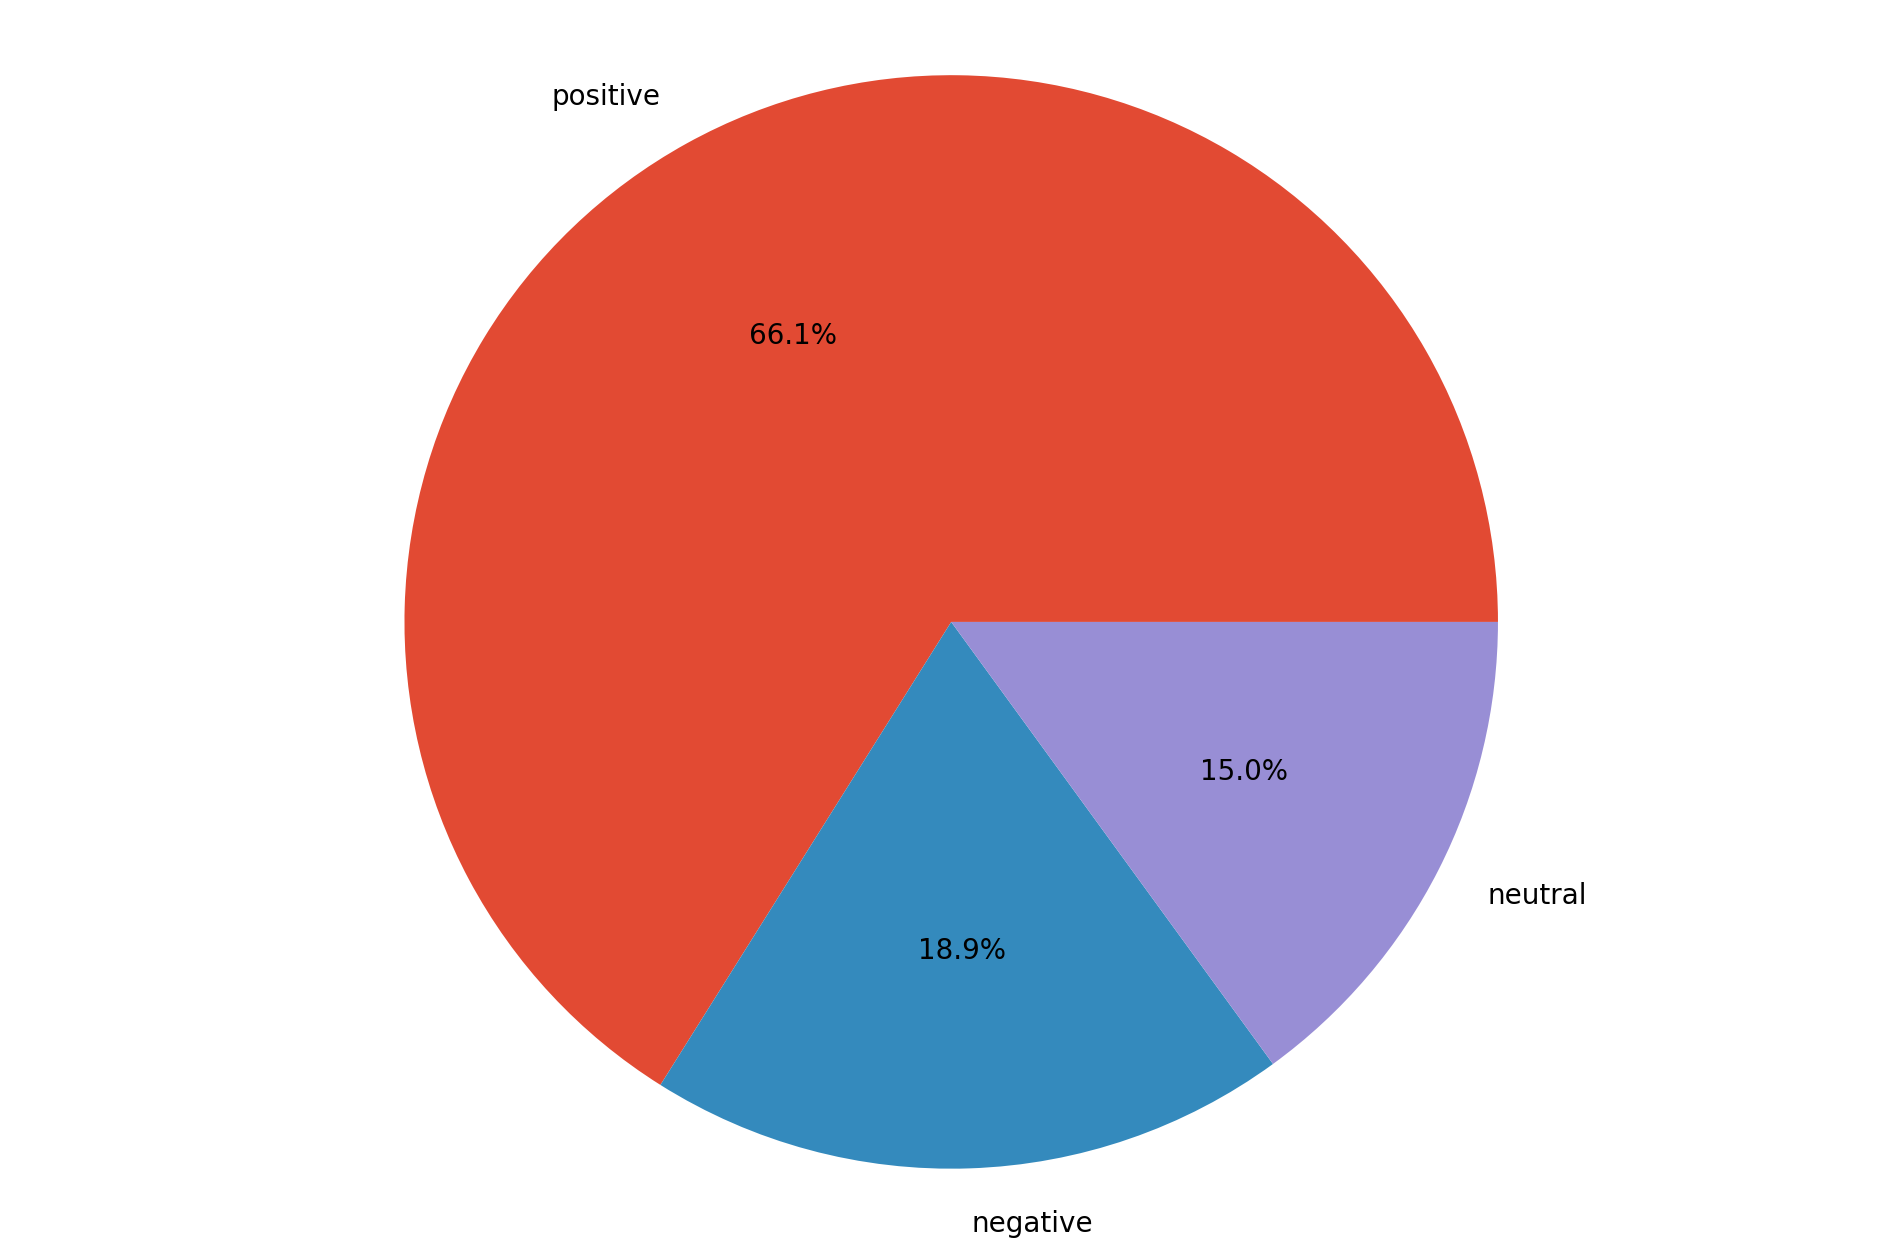

In [14]:
pie_sentiment = df.sentiment.value_counts(normalize=True)
plt.figure(figsize=(12,8), dpi=200)
labels=['positive', 'negative', 'neutral']
plt.pie(pie_sentiment, labels=labels, autopct='%1.1f%%')
plt.axis('equal');

### Text Manipulation

In [15]:
df['text'] = df['text'].str.lower()

In [16]:
df['text'] = df['text'].str.replace('[^\w\s]','')

<ipython-input-16-c8cd118dbf8e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')


In [17]:
df['text'] = df['text'].str.replace('\d+','')

<ipython-input-17-1dfc45ecc507>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d+','')


In [18]:
df['text'] = df['text'].str.replace('\n',' ').replace('\r','')

### Detecting Language

In [19]:
from langdetect import detect

In [20]:
df['language'] = df['text'].apply(detect)

In [21]:
df.head()

,stars,text,sentiment,language
0,5,after getting food poisoning at the palms hote...,positive,en
1,4,a feast worthy of gods baccarnal buffet in ca...,positive,en
2,4,the crab legs are better than the ones at wick...,positive,en
3,1,not worth it too salty food and expensive this...,negative,en
4,5,i would give this infinite stars if i could my...,positive,en


In [22]:
df.language.value_counts()

en       10373
es          10
zh-cn        7
ja           7
fr           6
ko           5
de           4
da           2
sk           1
pt           1
zh-tw        1
Name: language, dtype: int64

In [23]:
df = df[df['language']=='en']

In [50]:
df.language.unique()

array(['en'], dtype=object)

### Stopwords

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Serap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
df.text=df.text.replace(stopwords.words('english'),'')

C:\Users\Serap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


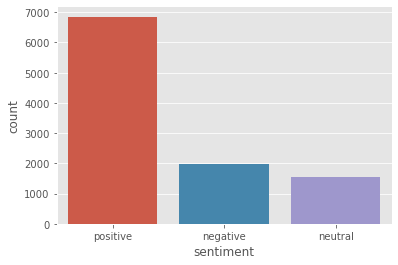

In [31]:
sns.countplot(df.sentiment);

In [32]:
df['sentiment'].value_counts(normalize=True)

positive    0.660561
negative    0.189338
neutral     0.150101
Name: sentiment, dtype: float64

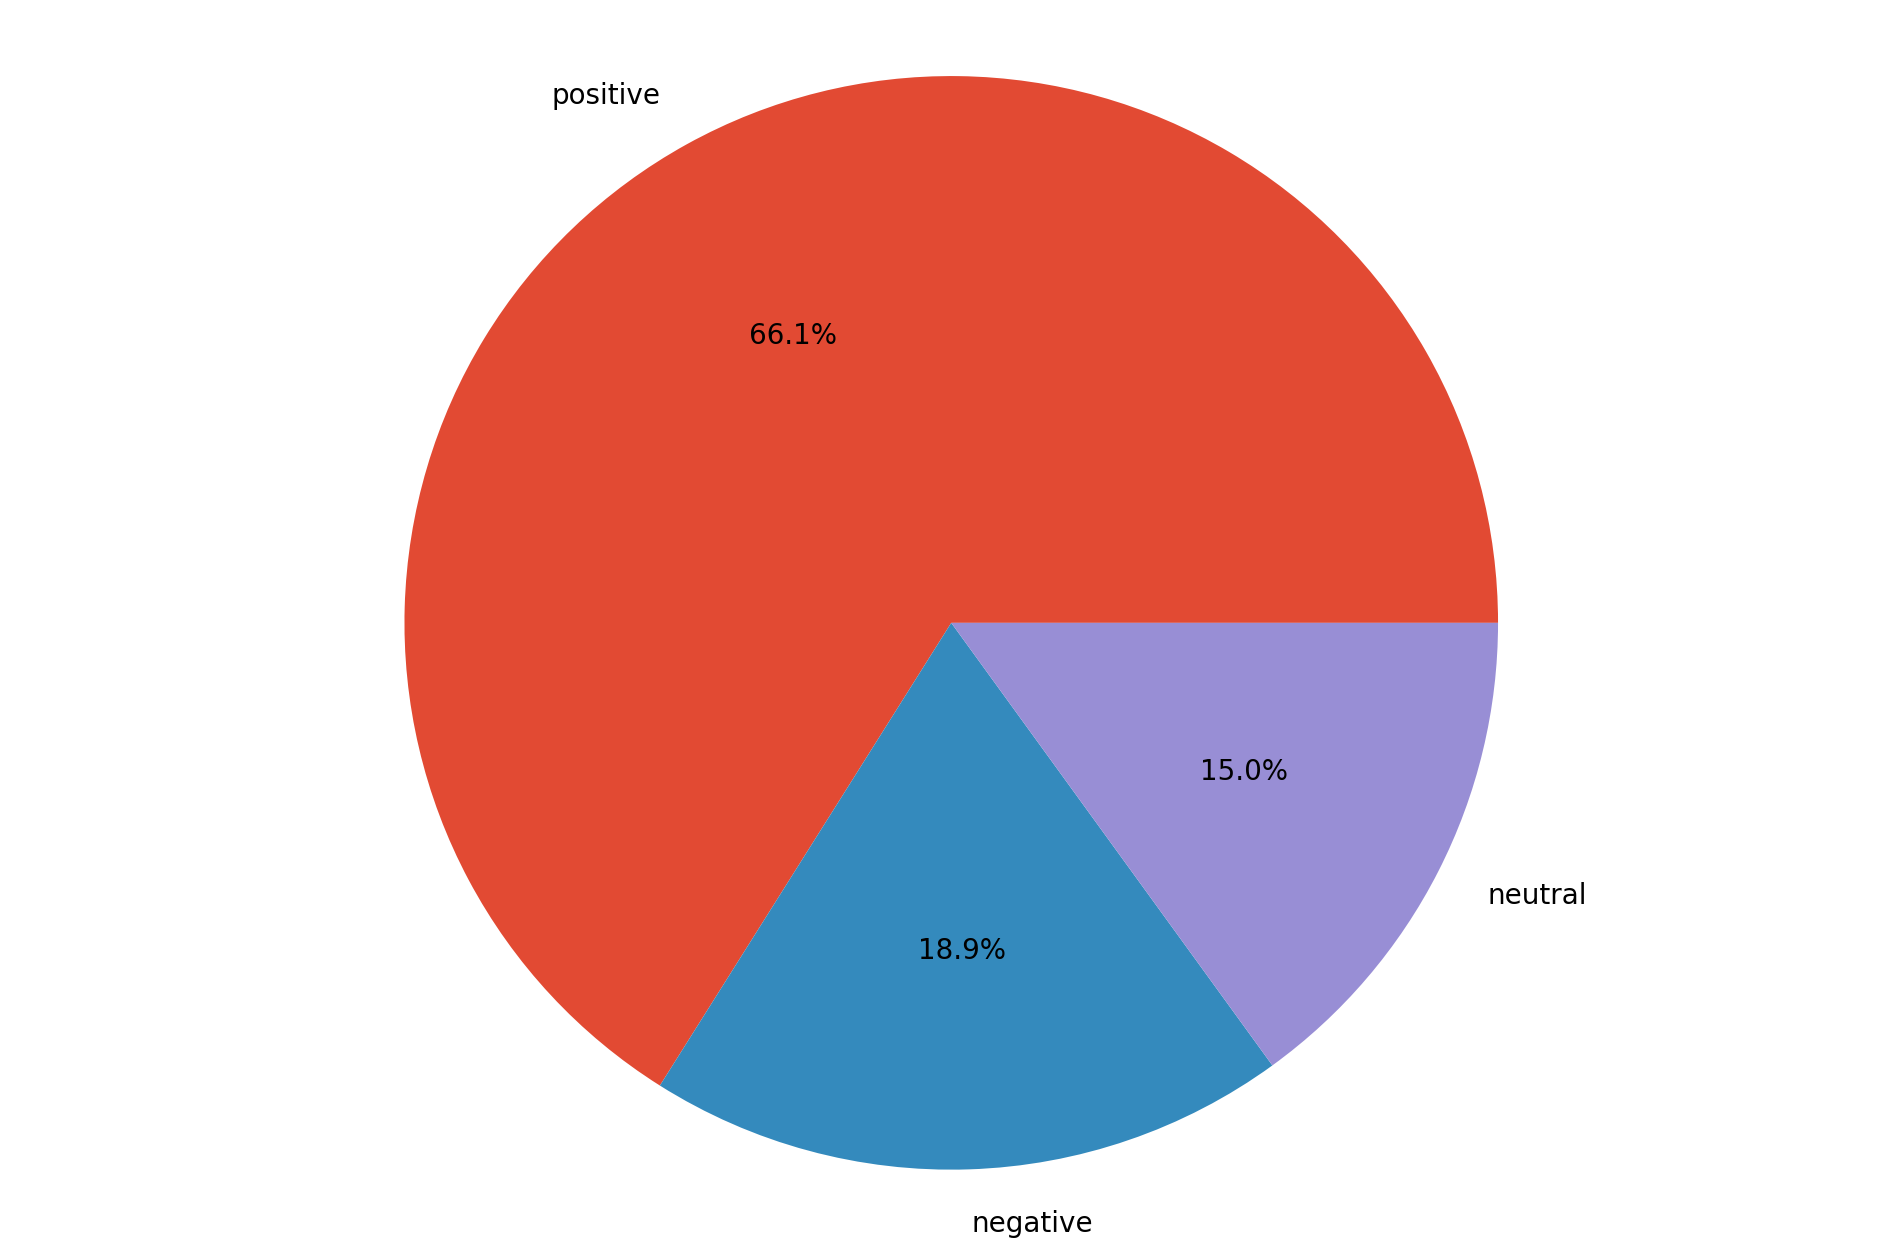

In [33]:
pie_sentiment = df.sentiment.value_counts(normalize=True)
plt.figure(figsize=(12,8), dpi=200)
labels=['positive', 'negative', 'neutral']
plt.pie(pie_sentiment, labels=labels, autopct='%1.1f%%')
plt.axis('equal');

In [34]:
from textblob import TextBlob

In [35]:
df[['polarity', 'subjectivity']] = df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [36]:
df.shape

(10373, 6)

### Word Cloud

In [37]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [38]:
def create_wordcloud(text):
    mask = np.array(Image.open('cloud.png'))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask=mask, max_words=25000,
                  stopwords= stopwords)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud saved successfully')
    display(Image.open('wc.png'))

Word Cloud saved successfully


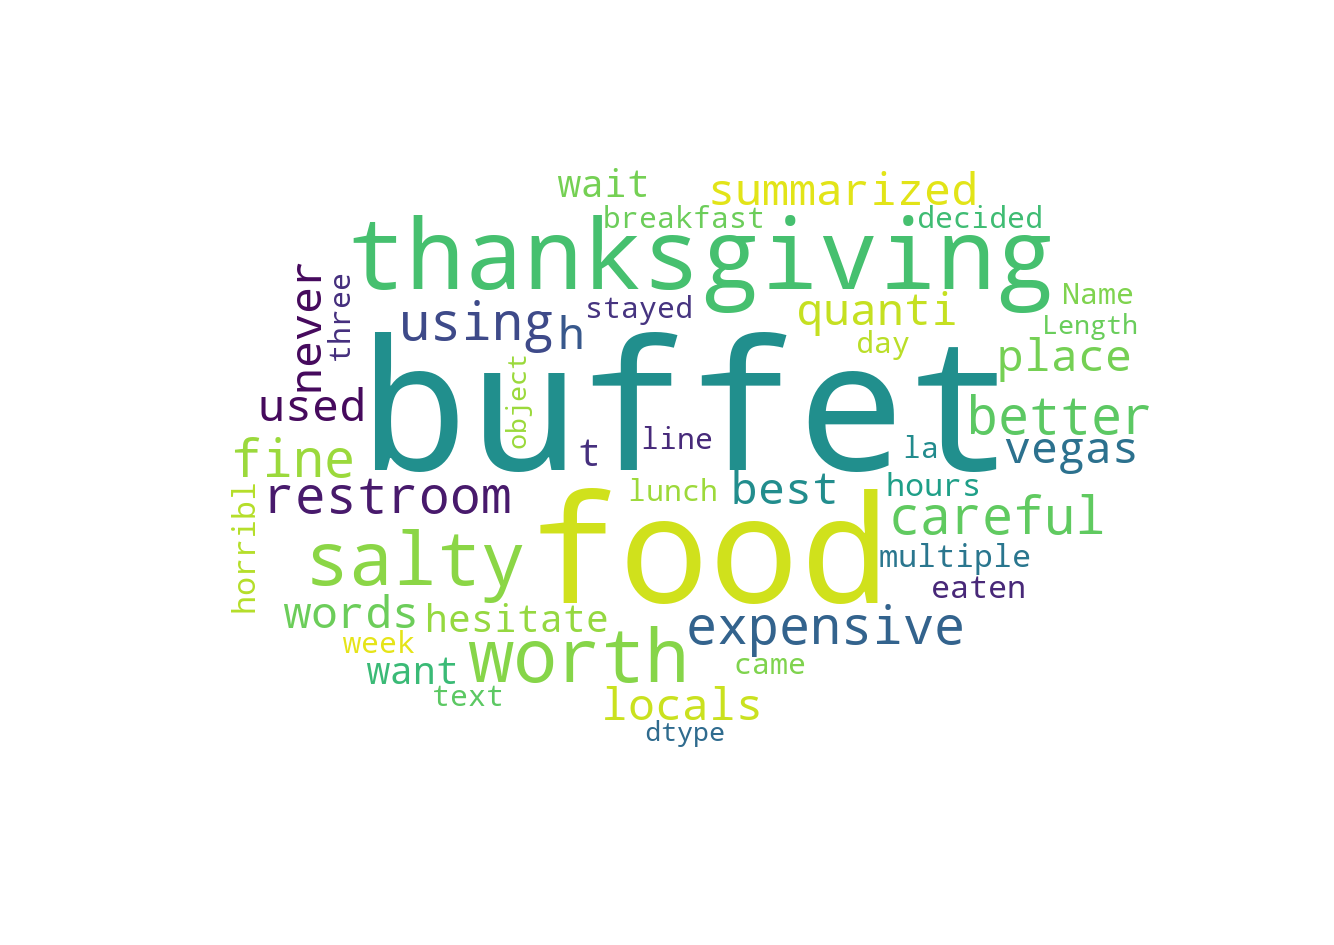

In [39]:
create_wordcloud(df[df['stars']==1].text)

Word Cloud saved successfully


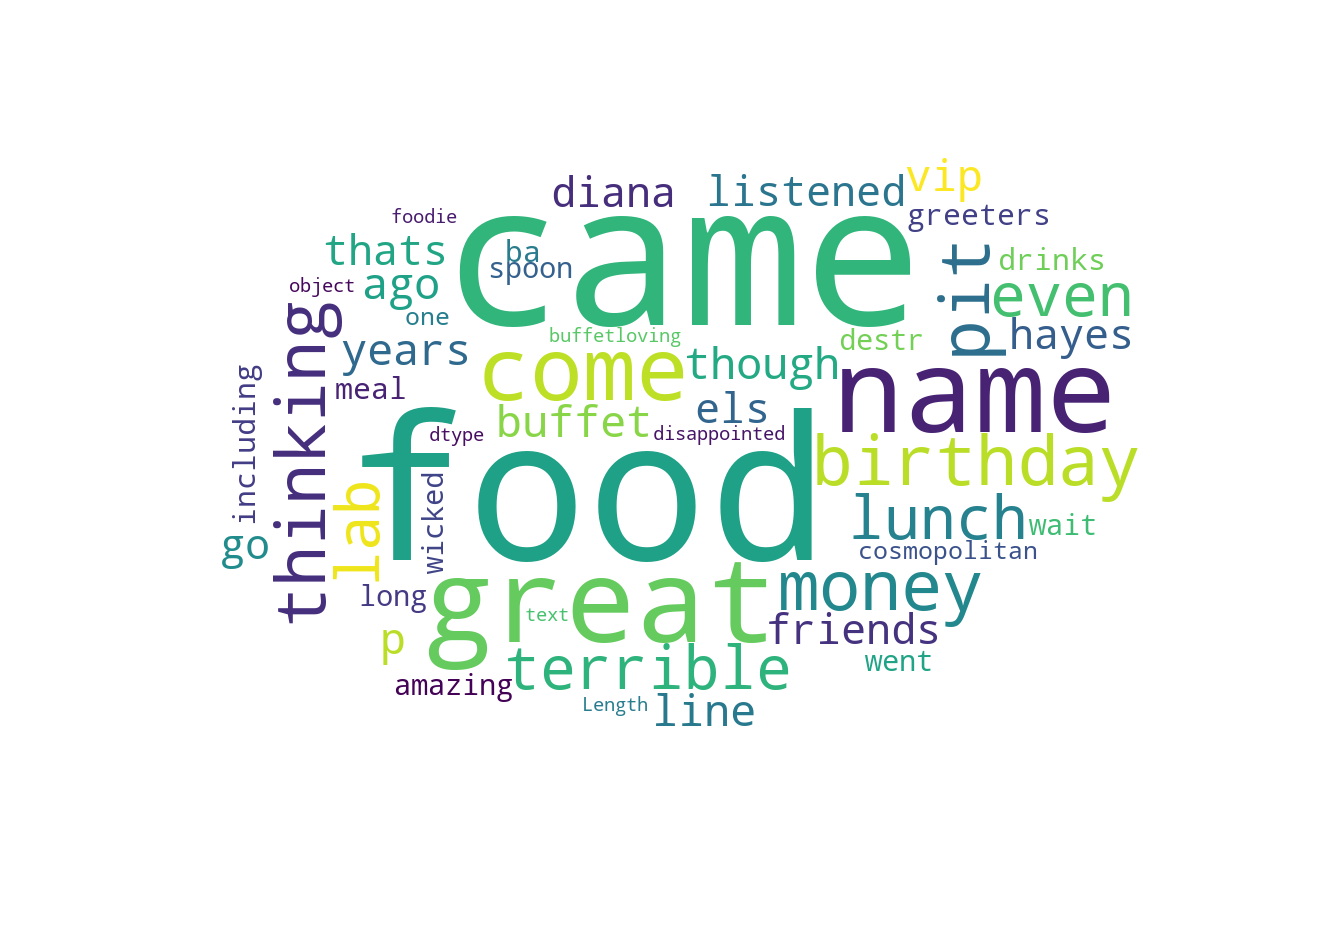

In [40]:
create_wordcloud(df[df['stars']==2].text)

Word Cloud saved successfully


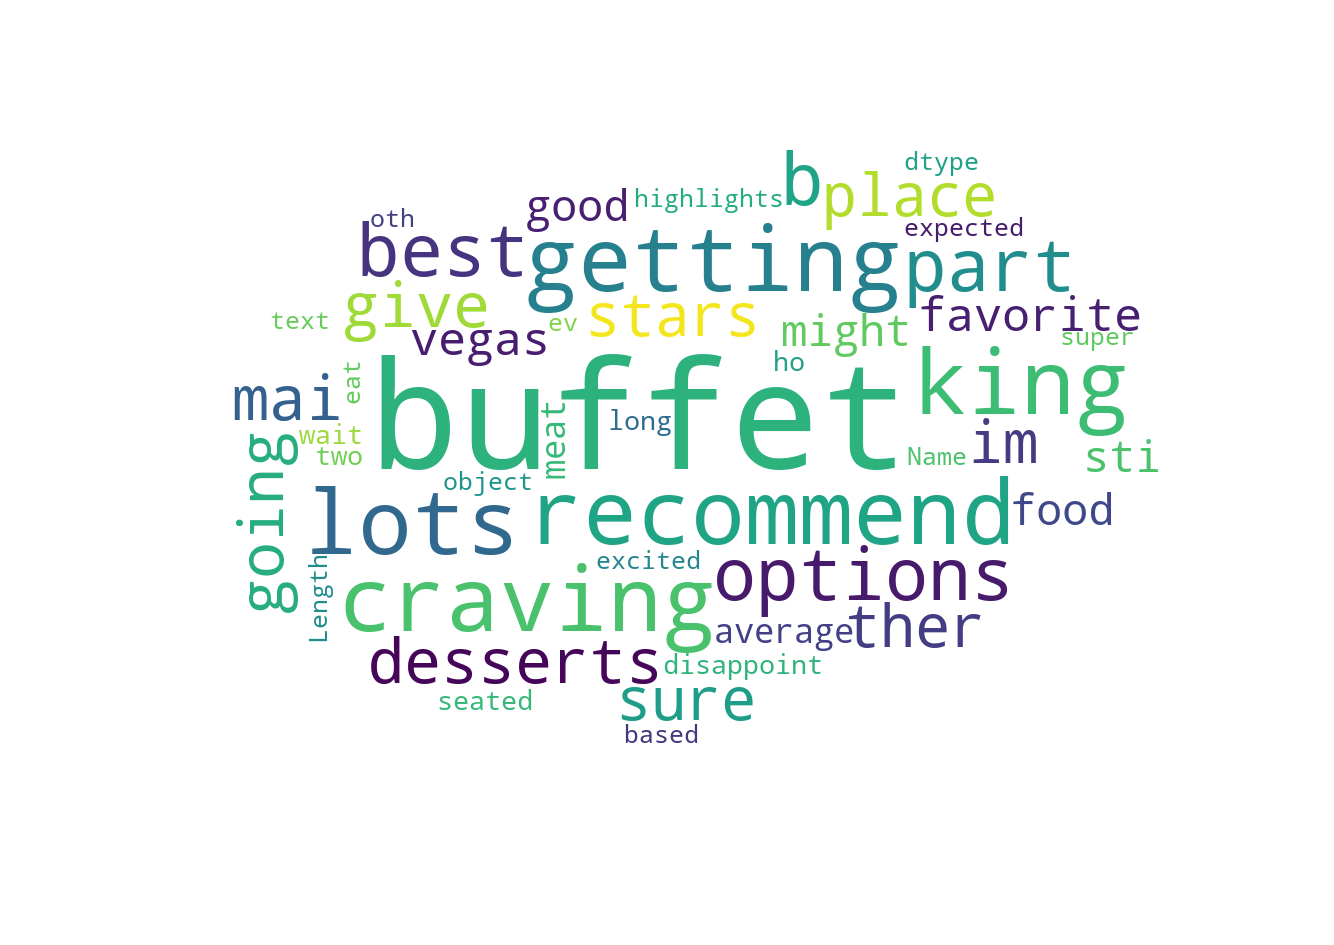

In [41]:
create_wordcloud(df[df['stars']==3].text)

Word Cloud saved successfully


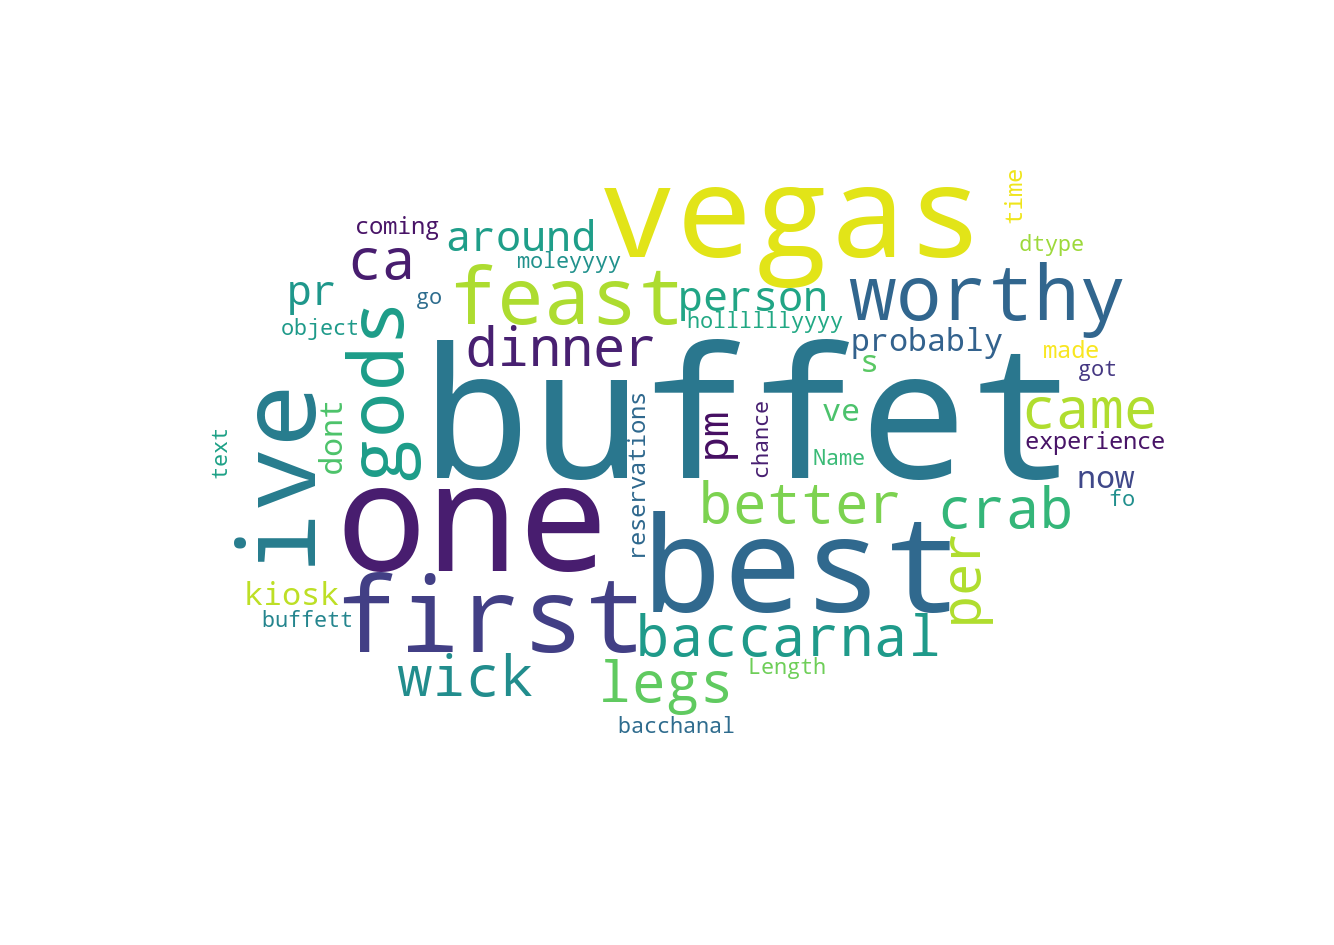

In [42]:
create_wordcloud(df[df['stars']==4].text)

Word Cloud saved successfully


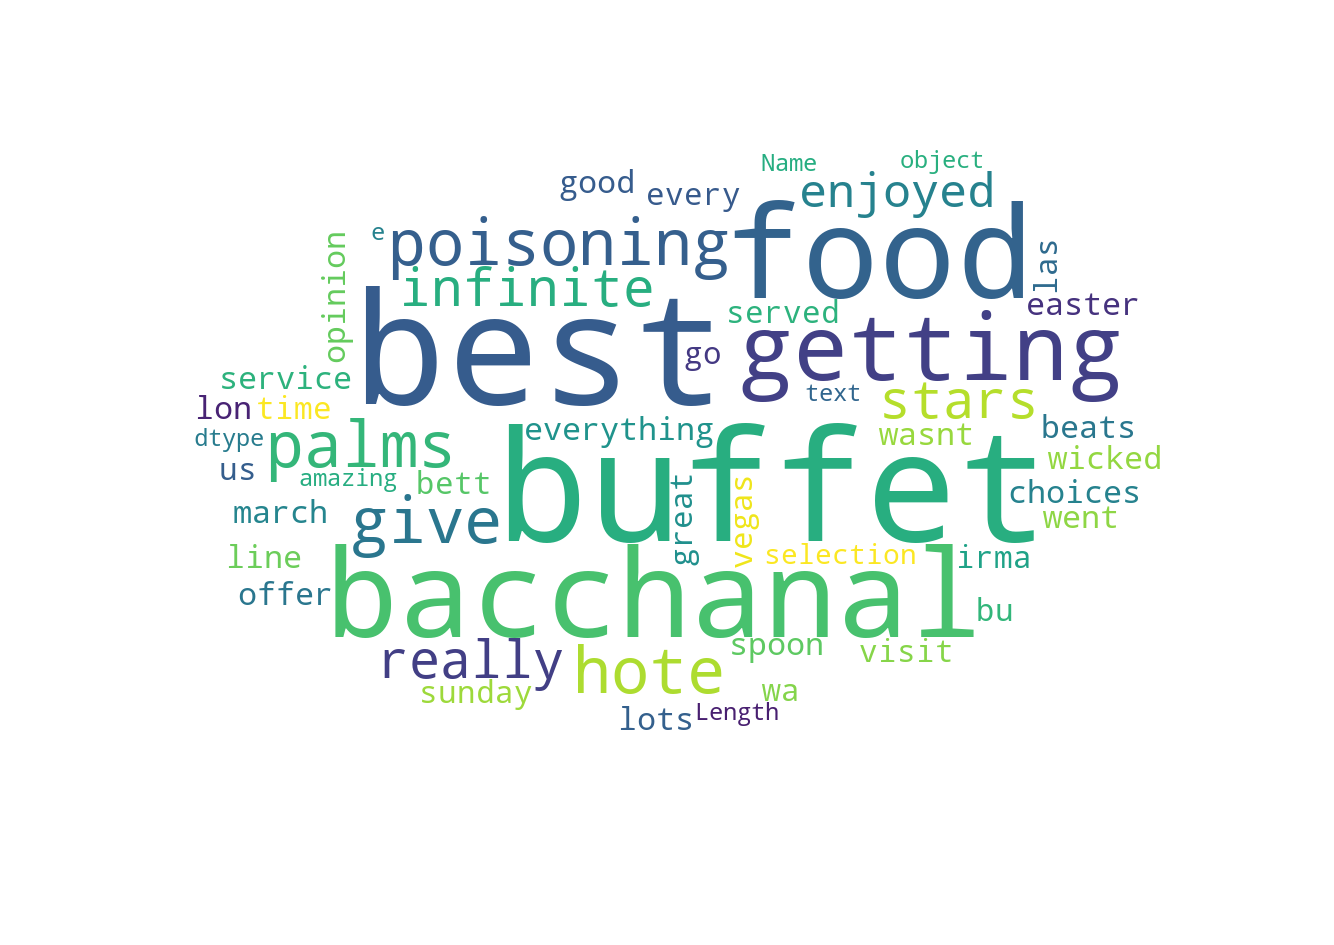

In [43]:
create_wordcloud(df[df['stars']==5].text)

### Predicting

In [44]:
x = df.text
y = df.sentiment

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [47]:
vect=CountVectorizer(stop_words='english')
x_train_dtm=vect.fit_transform(x_train)
x_test_dtm=vect.transform(x_test)

In [48]:
tf=pd.DataFrame(x_train_dtm.toarray(), columns=vect.get_feature_names())
tf.head()

,__,___,____,_________________________,__________________________,____________________________,_really_,_that_,aa,aaa,...,蒙古牛肉,蝦餃,裡面地方很大從自己桌子出發去拿一盤東西再走回來已經佔用了他們所限定時間兩小時裡的相當一部分時間,还要至少拍一个小时队,这家的肉食很不错人多的时候要排队等拿有好多种烤肉和香肠供选择,過了下午六點後才拿出來跟雪蟹混在一起跟其他所有菜一樣拿起來不太容易因為放的太靠內距離太遠,食材不新鲜,食物的選擇蠻多的也不錯不過牡蠣倒是不怎麼樣,饥饿营销明明里面很多空位还告诉我们要排队个半小时到个小时大厅很暗淡黑灯瞎火的食物一般吧就蟹比较新鲜好吃性价比不太高有点失望they,魚香茄子
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

dtc=DecisionTreeClassifier()
knnc=KNeighborsClassifier()
ber=BernoulliNB()
gaus=GaussianNB()
lrc=LogisticRegression()
gbc=GradientBoostingClassifier()

In [59]:
def tokenize_test(vect):
  x_train_dtm=vect.fit_transform(x_train)
  print('Features: ',x_train_dtm.shape[-1])
  x_test_dtm=vect.transform(x_test)
  M=MultinomialNB()
  LG=LogisticRegression()
  G=GradientBoostingClassifier()
  algo=[M,LG,G]
  algo_names=['MultinomialNB','LogisticReg','GradientBoosting']
  accu=[]
  for nb in algo:
    nb.fit(x_train_dtm,y_train)
    pred=nb.predict(x_test_dtm)
    accu.append(metrics.accuracy_score(y_test,pred))
  sozluk={'Accuracy':accu,'Models':algo_names}
  algos=pd.DataFrame(sozluk)
  return algos

In [60]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [61]:
vect=CountVectorizer(ngram_range=(1,1))
multi=tokenize_test(vect)

Features:  18716


C:\Users\Serap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
multi

,Accuracy,Models
0,0.795951,MultinomialNB
1,0.791774,LogisticReg
2,0.767031,GradientBoosting


### Complaints

In [65]:
def words(data):
    words=[i.lower() for j in data for i in j.split()]
    words=[i for i in words if len(i)>2]
    return words

In [66]:
df[df['stars']==1]['text']

3        not worth it too salty food and expensive this...
12       food is fine better than most buffets  when i ...
33       be careful using the restroom here while i was...
45       this buffet can be summarized in  words quanti...
50       this place used to be the best buffet i ever h...
                               ...                        
10367    we are locals in vegas and we never hesitate t...
10377    if you want to wait multiple hours for horribl...
10390    i  have eaten here for the breakfast and lunch...
10394    in thanksgiving day i stayed in line for three...
10410    came him from la thanksgiving week we decided ...
Name: text, Length: 1051, dtype: object

In [67]:
worst=words(df[df['stars']==1]['text'])

In [68]:
worst

['not',
 'worth',
 'too',
 'salty',
 'food',
 'and',
 'expensive',
 'this',
 'our',
 'furst',
 'and',
 'kast',
 'visit',
 'this',
 'buffet',
 'food',
 'fine',
 'better',
 'than',
 'most',
 'buffets',
 'when',
 'read',
 'about',
 'the',
 'wait',
 'doubted',
 'they',
 'were',
 'right',
 'minutes',
 'minimum',
 'food',
 'aint',
 'that',
 'good',
 'one',
 'line',
 'after',
 'another',
 'for',
 'overpriced',
 'food',
 'dont',
 'waste',
 'the',
 'cash',
 'buffet',
 'buffets',
 'pass',
 'that',
 'many',
 'lines',
 'and',
 'cost',
 'isnt',
 'worth',
 'bacchanal',
 'slow',
 'old',
 'hostess',
 'was',
 'rude',
 'too',
 'pricey',
 'careful',
 'using',
 'the',
 'restroom',
 'here',
 'while',
 'was',
 'the',
 'floor',
 'drain',
 'overflowed',
 'with',
 'human',
 'excrement',
 'all',
 'over',
 'feet',
 'and',
 'sandals',
 'was',
 'offered',
 'towel',
 'wash',
 'feet',
 'the',
 'sink',
 'and',
 'asked',
 'fill',
 'out',
 'incident',
 'reports',
 'with',
 'security',
 'after',
 'calming',
 'complainin

In [69]:
worst_freq=nltk.FreqDist(worst)
worst_freq=pd.DataFrame(worst_freq.most_common(10),columns=['Top_Words','Frequency'])

In [70]:
worst_freq

,Top_Words,Frequency
0,the,7675
1,and,4520
2,was,3027
3,for,2027
4,not,1475
5,that,1451
6,food,1401
7,this,1367
8,buffet,1259
9,they,1206


### Second Way

In [71]:
vect=CountVectorizer(ngram_range=(1,3),binary=True)
tf=pd.DataFrame(vect.fit_transform(df[df.stars==1].text).toarray(),columns=vect.get_feature_names())
features=vect.get_feature_names()
tf.shape

(1051, 178589)

In [72]:
tf

,aback,aback by,aback by it,abandoned,abandoned chinatown,abandoned chinatown how,abandoned prime,abandoned prime ribs,abide,abide though,...,zone,zone and,zone and try,zone going,zone going bonkers,zone stephanie,zone stephanie then,中国游客别去chinese,中国游客别去chinese tourists,中国游客别去chinese tourists you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
vect= CountVectorizer(ngram_range=(4,5),binary=True)
df=vect.fit_transform(df[df.stars==1].text).toarray().sum(axis=0)
mod_df=pd.DataFrame(df.reshape(1,264252),columns=vect.get_feature_names())
mod_df

,aback by it its,aback by it its never,abandoned chinatown how can,abandoned chinatown how can this,abandoned prime ribs tasted,abandoned prime ribs tasted like,abide though is that,abide though is that for,abiding by proper food,abiding by proper food preparation,...,zipped right in in,zipped right in in fact,zone and try new,zone and try new place,zone going bonkers im,zone going bonkers im not,zone stephanie then tells,zone stephanie then tells us,中国游客别去chinese tourists you deserve,中国游客别去chinese tourists you deserve better
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [75]:
mod_df.max().sort_values(ascending=False)[:10]

the best buffet in          38
to wait in line             29
best buffet in vegas        28
of the food was             24
the best buffet in vegas    23
not worth the price         22
not worth the money         20
quality of the food         19
the prime rib was           19
the front of the            19
dtype: int64